In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.model_fpgan import FPGANSynthesizer
from models.model_ctgan import CTGANSynthesizer
from models.model_dpctgan import DPCTGANSynthesizer

import ctgan
from sklearn.model_selection import train_test_split
from utils.privacy import normalized_avg_dist
from utils.fidelity import get_predictions, eval_fidelity, get_accuracy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("D:/Datasets/breast/data.csv")
data = data.drop(columns=['Unnamed: 32'])
data = data.drop(columns=['id'])
data.loc[data["diagnosis"] == 'M' , "diagnosis"] = 0
data.loc[data["diagnosis"] == 'B' , "diagnosis"] = 1
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#normalized_data=(data-data.mean())/data.std()
data=(data-data.min())/(data.max()-data.min())
data.head()
data.shape

(569, 31)

In [5]:
target = 'diagnosis'

In [6]:
X = data.drop(columns=[target])
y = data[target]
y=y.astype('int')

In [7]:
#model_ctgan = CTGANSynthesizer(epochs=1)
#model_ctgan = DPCTGANSynthesizer(verbose=True, epochs=25)
model_ctgan = FPGANSynthesizer(verbose=True, epochs=2000)
#original_losses, tranformed_privacies, losses = model_ctgan.fit(data)
model_ctgan.fit(data, rate=0.25)

Epoch 1, Loss G: -0.3568,Loss D:  0.0103
Epoch 2, Loss G: -0.3582,Loss D: -0.0311
Epoch 3, Loss G: -0.3586,Loss D: -0.1325
Epoch 4, Loss G: -0.3589,Loss D: -0.2187
Epoch 5, Loss G: -0.3586,Loss D: -0.2856
Epoch 6, Loss G: -0.3558,Loss D: -0.4159
Epoch 7, Loss G: -0.3507,Loss D: -0.5848
Epoch 8, Loss G: -0.3444,Loss D: -0.7303
Epoch 9, Loss G: -0.3339,Loss D: -0.9782
Epoch 10, Loss G: -0.3240,Loss D: -1.2948
Epoch 11, Loss G: -0.3176,Loss D: -1.5923
Epoch 12, Loss G: -0.3056,Loss D: -1.9702
Epoch 13, Loss G: -0.2879,Loss D: -2.3633
Epoch 14, Loss G: -0.2738,Loss D: -2.6935
Epoch 15, Loss G: -0.2731,Loss D: -2.9901
Epoch 16, Loss G: -0.2782,Loss D: -3.1643
Epoch 17, Loss G: -0.2833,Loss D: -3.3315
Epoch 18, Loss G: -0.3067,Loss D: -3.2808
Epoch 19, Loss G: -0.3243,Loss D: -3.1139
Epoch 20, Loss G: -0.3529,Loss D: -2.2606
Epoch 21, Loss G: -0.3920,Loss D: -1.6911
Epoch 22, Loss G: -0.4129,Loss D: -1.5324
Epoch 23, Loss G: -0.4481,Loss D: -1.0768
Epoch 24, Loss G: -0.4687,Loss D: -0.6419
E

([array(0.00257416, dtype=float32),
  array(0.00588701, dtype=float32),
  array(0.01456469, dtype=float32),
  array(0.02611677, dtype=float32),
  array(0.0387899, dtype=float32),
  array(0.06685042, dtype=float32),
  array(0.09306163, dtype=float32),
  array(0.12742868, dtype=float32),
  array(0.17712043, dtype=float32),
  array(0.22681479, dtype=float32),
  array(0.25574467, dtype=float32),
  array(0.29708144, dtype=float32),
  array(0.3662799, dtype=float32),
  array(0.40651515, dtype=float32),
  array(0.3962682, dtype=float32),
  array(0.3608493, dtype=float32),
  array(0.32145965, dtype=float32),
  array(0.20990497, dtype=float32),
  array(0.12790254, dtype=float32),
  array(-0.00015606, dtype=float32),
  array(-0.16297132, dtype=float32),
  array(-0.25623924, dtype=float32),
  array(-0.4044029, dtype=float32),
  array(-0.48932737, dtype=float32),
  array(-0.53931403, dtype=float32),
  array(-0.59083587, dtype=float32),
  array(-0.5980923, dtype=float32),
  array(-0.67497426, dtype

In [8]:
from utils.utils import save_models
save_models(model_ctgan,'025fpgan2000', 'breast_cancer')

In [9]:
from utils.utils import load_models
model_ctgan = load_models('025fpgan2000', 'breast_cancer')

In [10]:
samples = model_ctgan.sample(len(data))  # Synthetic copy
samples.dropna(how='any', inplace=True)

X_syn = samples.drop(columns=[target])
y_syn = samples[target]
y_syn = y_syn.round(0)
y_syn = y_syn.astype(int)

## Privacy

In [11]:
samples = samples.apply(pd.to_numeric) # convert all columns of DataFrame
data = data.apply(pd.to_numeric) # convert all columns of DataFrame

In [12]:
normalized_avg_distance = normalized_avg_dist(samples, data)
print(normalized_avg_distance)

[0.26651515]


In [13]:
samples.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.035913,-0.097086,0.101524,0.200057,0.311254,0.220321,0.274448,0.762038,0.272051,0.201819,...,0.058925,0.558358,0.448802,-0.010223,1.106695,-0.019604,0.621730,0.646200,0.374718,-0.033079
1,0.202977,0.427844,-0.108857,-0.049130,0.103105,0.635117,-0.067429,0.518601,0.045898,0.035865,...,-0.034987,0.099058,1.253383,0.446921,0.148468,0.084961,-0.084820,0.504866,-0.083497,0.310152
2,0.873651,0.182661,0.839795,-0.090377,-0.048023,0.367968,0.330901,0.138918,0.817535,0.653256,...,0.215995,-0.094563,-0.093941,0.082393,0.774626,0.147884,-0.089697,0.292791,-0.266679,-0.066065
3,1.047844,0.605733,0.576349,0.881184,0.487414,0.519385,0.329631,0.237968,0.816096,-0.012807,...,0.504271,0.559576,0.915347,0.643753,0.533448,0.634953,1.044182,0.685138,0.605639,0.321538
4,1.072440,-0.178283,0.052371,0.110583,0.426797,-0.018565,1.239657,0.849995,0.195392,-0.061938,...,-0.171576,-0.178053,0.105680,-0.211404,0.260588,0.257174,0.145521,-0.186542,-0.053611,0.062732


## Fidelity

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42, stratify=y_syn)

rr_pred = []
fr_pred = []
ff_pred = []
rf_pred = []

rr_pred = get_predictions(X_train, y_train, X_test, y_test, undersample = False)
fr_pred = get_predictions(X_syn_train, y_syn_train, X_test, y_test, undersample = False)

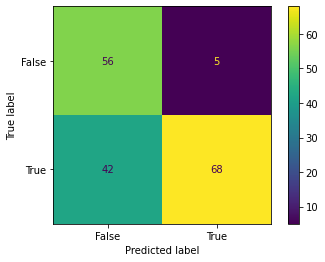

In [15]:
from sklearn import metrics
def print_confusion_matrix(rr_pred, fr_pred):
    confusion_matrix = metrics.confusion_matrix(rr_pred, fr_pred)

    cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display1.plot()
    plt.show()
    
print_confusion_matrix(rr_pred, fr_pred)

In [16]:
percentage = eval_fidelity(rr_pred, fr_pred)

In [17]:
rr_acc = get_accuracy(y_test, rr_pred)
fr_acc = get_accuracy(y_test, fr_pred)
print("Accuracy of real data: ", rr_acc)
print("Accuracy of synthetic data: ", fr_acc)

Accuracy of real data:  0.9590643274853801
Accuracy of synthetic data:  0.7309941520467836


In [18]:
from utils.fidelity import get_roc_auc

rr_score = get_roc_auc(y_test, rr_pred)
fr_score = get_roc_auc(y_test, fr_pred)
print("ROC AUC of real data: ", rr_score)
print("ROC AUC of synthetic data: ", fr_score)

ROC AUC of real data:  0.9515917056074766
ROC AUC of synthetic data:  0.7662091121495327


## Final plot

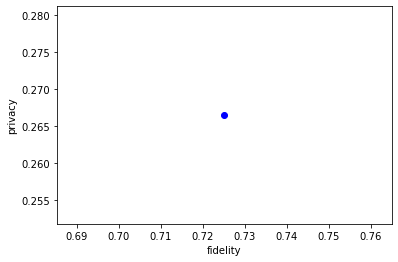

0.7251461988304093 [0.26651515]


In [19]:
plt.scatter(percentage, normalized_avg_distance, c ="blue")
plt.xlabel("fidelity")
plt.ylabel("privacy")
plt.show()
print(percentage, normalized_avg_distance)